In [1]:
from pathlib import Path

base = Path("/home/timgarrels/Projects/masterthesis/MA_analytics/real_analysis_out/human_brain_development_cutoff_0.772.edgelist/")

In [2]:
import os
import json


k = 4
m = "degree"
#m = 'graph module participation ratio'
#m = 'mean normalized anchor hop distance'
raw = base / "raw" / str(k) / "human_brain_development_cutoff_0.772.edgelist"

metric_values = raw / "consolidated_metrics" / m

with open(metric_values, "r") as metric_f:
    metrics = json.load(metric_f)        

In [3]:
with open(raw / "frequency", "r") as f:
    graphlet_freqencies = json.load(f)
graphlet_freqencies

{'0110 1001 1000 0100': 252358,
 '0111 1000 1000 1000': 234582,
 '0111 1010 1100 1000': 109178,
 '0110 1001 1001 0110': 3196,
 '0111 1011 1100 1100': 12972,
 '0111 1011 1101 1110': 4055}

In [4]:
os.listdir(raw / "consolidated_metrics")

['graph module participation ratio',
 'max normalized anchor hop distance',
 'degree',
 'min normalized anchor hop distance',
 'mean normalized anchor hop distance']

In [5]:
metrics.keys()

dict_keys(['0110 1001 1000 0100', '0110 1001 1001 0110', '0111 1000 1000 1000', '0111 1010 1100 1000', '0111 1011 1100 1100', '0111 1011 1101 1110'])

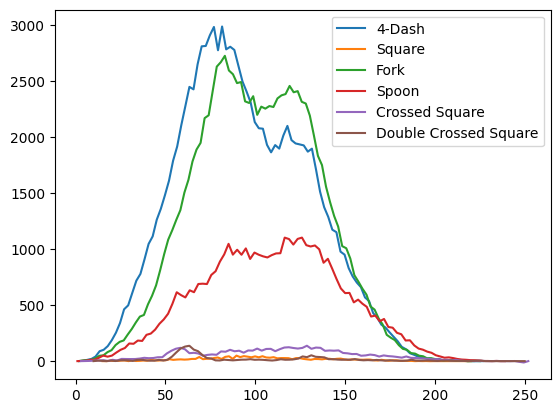

In [10]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

from pmotif_lib.graphlet_representation import graphlet_class_to_name


for k in metrics:
    dist = Counter(metrics[k])
    x = [k for k in sorted(dist.keys())]
    y = [dist[k] for k in sorted(dist.keys())]
    
    xnew = np.linspace(min(x), max(x), 100)  

    spl = make_interp_spline(x, y, k=3)

    power_smooth = spl(xnew)

    plt.plot(xnew, power_smooth, label=graphlet_class_to_name(k))
plt.legend()
plt.show()

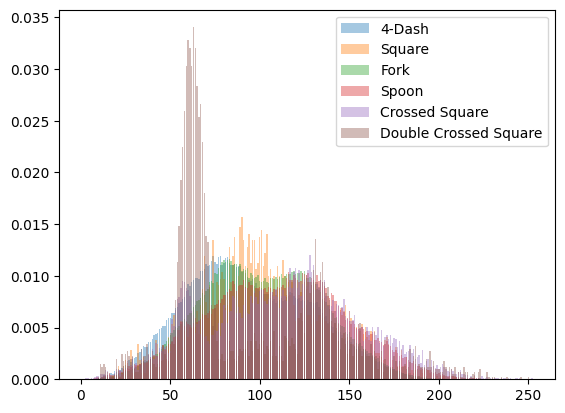

In [8]:

for k in list(metrics.keys()):
    
    rounded_metrics = [round(v, 3) for v in metrics[k]]
    dist = Counter(rounded_metrics)
    
    # Realtive to total
    values = [v / graphlet_freqencies[k] for v in dist.values()]
        
    plt.bar(dist.keys(), values, alpha=0.4,label=graphlet_class_to_name(k))
    plt.legend()